# Welcome to the Quantum Parallel Universe

### Before Running this Notebook

- Create a `token.txt` file in the same folder as this notebook
  - `token.txt` should contain a token sufficient for [`qiskit_ibm_provider.IBMProvider()`](https://github.com/Qiskit/qiskit-ibm-provider#enable-account-for-current-session) authentication.

---

### Get Token

In [1]:
token = None
with open('token.txt', 'r') as f:
  token = f.read().strip()

### Imports

In [2]:
import math
from qiskit import QuantumCircuit
from qiskit.circuit import Qubit

### Generate Linear Time Complexity Circuits for $|\text{GHZ}_N\rangle$

In [3]:
def linear_complexity_GHZ(N: int) -> QuantumCircuit:
  if not isinstance(N, int):
    raise TypeError("Only integer arguments accepted.")
  if N < 1:
    raise ValueError("There must be one or more qubits.")

  c = QuantumCircuit(N)
  c.reset([i for i in range(N)])
  c.h(0)
  for i in range(1, N):
    c.cx(i-1, i)
  c.measure_active()
  return c

### Generate Logaritmic Complexity Circuits for $|\text{GHZ}_{2^m}\rangle$

In [4]:
def _log_complexity_GHZ(m: int) -> QuantumCircuit:
  if not isinstance(m, int):
    raise TypeError("Only integer arguments accepted.")
  if m < 0:
    raise ValueError("`m` must be at least 0 (evaluated 2^m).")

  if m == 0:
    c = QuantumCircuit([Qubit()])
    c.reset(0)
    c.h(0)
  else:
    c = _log_complexity_GHZ(m - 1)
    for i in range(c.num_qubits):
      c.add_bits([Qubit()])
      new_qubit_index = c.num_qubits - 1
      c.reset(new_qubit_index)
      c.cx(i, new_qubit_index)
  return c

### Generate Logaritmic Complexity Circuits for $|\text{GHZ}_N\rangle$

In [5]:
def log_complexity_GHZ(N: int) -> QuantumCircuit:
  if not isinstance(N, int):
    raise TypeError("Only an integer argument is accepted.")
  if N < 1:
    raise ValueError("There must be one or more qubits.")

  m = math.ceil(math.log2(N))
  num_qubits_to_erase = 2**m - N
  old_circuit = _log_complexity_GHZ(m=m)
  new_num_qubits = old_circuit.num_qubits - num_qubits_to_erase
  new_circuit = QuantumCircuit(new_num_qubits)
  for gate in old_circuit.data:
    qubits_affected = gate.qubits
    if all(old_circuit.find_bit(qubit).index < new_num_qubits for qubit in qubits_affected):
      new_circuit.append(gate[0], [old_circuit.find_bit(qubit).index for qubit in qubits_affected])
  new_circuit.measure_active()
  return new_circuit


---

In [6]:
N=5

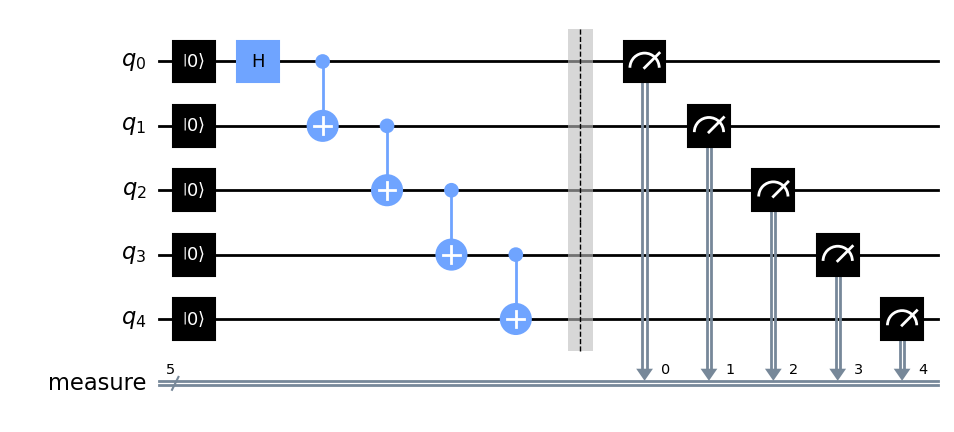

In [7]:
linear_complexity_GHZ(N=N).draw(output='mpl')

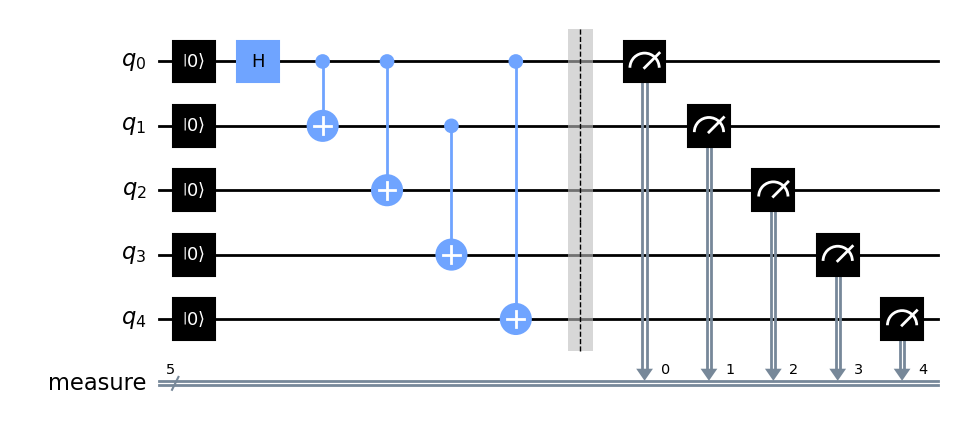

In [8]:
log_complexity_GHZ(N=N).draw(output='mpl')